# Table of Contents
 <p>

The idea of this notebook is to propose WRI - AQ floods team, a schema for the database where to store the data and at the same time a simple overview of the schema for the analysis microservice.

First of all we are going to check all csv files stored in folder flood data.  
Second we are going to understand what the scripts stored in script folder does.  
Finally propose the model.

In [39]:
import pandas as pd
import json
import os
import configparser
from sqlalchemy import *
from sqlalchemy_schemadisplay import create_schema_graph
from IPython.display import Image, display

#### Global varible configuration
workPath = '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/aqueduct/data_source/floods/floods_vizzuality/Flood_Data' 

In [38]:
files = []
for (dirpath, dirnames, filenames) in os.walk(workPath):
    files.extend([{'path':os.path.join(dirpath,file), 'fileName': file} for file in filenames if '.csv' in file])
list_of_dfs = [{'data': pd.read_csv(file['path']), 
                'fileName': file['path'],
                'path':file['path']
               } for file in files]

[{'path': '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/aqueduct/data_source/floods/floods_vizzuality/Flood_Data/lookup_assets_Basin.csv', 'fileName': 'lookup_assets_Basin.csv'}, {'path': '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/aqueduct/data_source/floods/floods_vizzuality/Flood_Data/lookup_assets_City.csv', 'fileName': 'lookup_assets_City.csv'}, {'path': '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/aqueduct/data_source/floods/floods_vizzuality/Flood_Data/lookup_assets_Country.csv', 'fileName': 'lookup_assets_Country.csv'}, {'path': '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/aqueduct/data_source/floods/floods_vizzuality/Flood_Data/lookup_assets_State.csv', 'fileName': 'lookup_assets_State.csv'}, {'path': '/Users/alicia/Projects/jupyter-geotools-alpine/work/data/aqueduct/data_source/floods/floods_vizzuality/Flood_Data/lookup_construction_factors_geogunit_108.csv', 'fileName': 'lookup_construction_factors_geogunit_108.csv'}, {'pat

In [47]:
for dataset in list_of_dfs:
    print(dataset['fileName'].split('/')[-1])
    display(dataset['data'].shape)
    display(dataset['data'].columns)

lookup_assets_Basin.csv


(230, 37)

Index(['Unnamed: 0', 'POPexp_PES_AST_2010_tot', 'POPexp_PES_AST_2030_tot',
       'POPexp_PES_AST_2050_tot', 'POPexp_PES_AST_2080_tot',
       'POPexp_BAU_AST_2010_tot', 'POPexp_BAU_AST_2030_tot',
       'POPexp_BAU_AST_2050_tot', 'POPexp_BAU_AST_2080_tot',
       'POPexp_OPT_AST_2010_tot', 'POPexp_OPT_AST_2030_tot',
       'POPexp_OPT_AST_2050_tot', 'POPexp_OPT_AST_2080_tot',
       'GDPexp_PES_AST_2010_tot', 'GDPexp_PES_AST_2030_tot',
       'GDPexp_PES_AST_2050_tot', 'GDPexp_PES_AST_2080_tot',
       'GDPexp_BAU_AST_2010_tot', 'GDPexp_BAU_AST_2030_tot',
       'GDPexp_BAU_AST_2050_tot', 'GDPexp_BAU_AST_2080_tot',
       'GDPexp_OPT_AST_2010_tot', 'GDPexp_OPT_AST_2030_tot',
       'GDPexp_OPT_AST_2050_tot', 'GDPexp_OPT_AST_2080_tot',
       'Urban_Damage_v2_PES_AST_2010_tot', 'Urban_Damage_v2_PES_AST_2030_tot',
       'Urban_Damage_v2_PES_AST_2050_tot', 'Urban_Damage_v2_PES_AST_2080_tot',
       'Urban_Damage_v2_BAU_AST_2010_tot', 'Urban_Damage_v2_BAU_AST_2030_tot',
       'Urban_Dam

lookup_assets_City.csv


(120, 37)

Index(['Unnamed: 0', 'POPexp_PES_AST_2010_tot', 'POPexp_PES_AST_2030_tot',
       'POPexp_PES_AST_2050_tot', 'POPexp_PES_AST_2080_tot',
       'POPexp_BAU_AST_2010_tot', 'POPexp_BAU_AST_2030_tot',
       'POPexp_BAU_AST_2050_tot', 'POPexp_BAU_AST_2080_tot',
       'POPexp_OPT_AST_2010_tot', 'POPexp_OPT_AST_2030_tot',
       'POPexp_OPT_AST_2050_tot', 'POPexp_OPT_AST_2080_tot',
       'GDPexp_PES_AST_2010_tot', 'GDPexp_PES_AST_2030_tot',
       'GDPexp_PES_AST_2050_tot', 'GDPexp_PES_AST_2080_tot',
       'GDPexp_BAU_AST_2010_tot', 'GDPexp_BAU_AST_2030_tot',
       'GDPexp_BAU_AST_2050_tot', 'GDPexp_BAU_AST_2080_tot',
       'GDPexp_OPT_AST_2010_tot', 'GDPexp_OPT_AST_2030_tot',
       'GDPexp_OPT_AST_2050_tot', 'GDPexp_OPT_AST_2080_tot',
       'Urban_Damage_v2_PES_AST_2010_tot', 'Urban_Damage_v2_PES_AST_2030_tot',
       'Urban_Damage_v2_PES_AST_2050_tot', 'Urban_Damage_v2_PES_AST_2080_tot',
       'Urban_Damage_v2_BAU_AST_2010_tot', 'Urban_Damage_v2_BAU_AST_2030_tot',
       'Urban_Dam

lookup_assets_Country.csv


(234, 37)

Index(['Unnamed: 0', 'POPexp_PES_AST_2010_tot', 'POPexp_PES_AST_2030_tot',
       'POPexp_PES_AST_2050_tot', 'POPexp_PES_AST_2080_tot',
       'POPexp_BAU_AST_2010_tot', 'POPexp_BAU_AST_2030_tot',
       'POPexp_BAU_AST_2050_tot', 'POPexp_BAU_AST_2080_tot',
       'POPexp_OPT_AST_2010_tot', 'POPexp_OPT_AST_2030_tot',
       'POPexp_OPT_AST_2050_tot', 'POPexp_OPT_AST_2080_tot',
       'GDPexp_PES_AST_2010_tot', 'GDPexp_PES_AST_2030_tot',
       'GDPexp_PES_AST_2050_tot', 'GDPexp_PES_AST_2080_tot',
       'GDPexp_BAU_AST_2010_tot', 'GDPexp_BAU_AST_2030_tot',
       'GDPexp_BAU_AST_2050_tot', 'GDPexp_BAU_AST_2080_tot',
       'GDPexp_OPT_AST_2010_tot', 'GDPexp_OPT_AST_2030_tot',
       'GDPexp_OPT_AST_2050_tot', 'GDPexp_OPT_AST_2080_tot',
       'Urban_Damage_v2_PES_AST_2010_tot', 'Urban_Damage_v2_PES_AST_2030_tot',
       'Urban_Damage_v2_PES_AST_2050_tot', 'Urban_Damage_v2_PES_AST_2080_tot',
       'Urban_Damage_v2_BAU_AST_2010_tot', 'Urban_Damage_v2_BAU_AST_2030_tot',
       'Urban_Dam

lookup_assets_State.csv


(3490, 37)

Index(['Unnamed: 0', 'POPexp_PES_AST_2010_tot', 'POPexp_PES_AST_2030_tot',
       'POPexp_PES_AST_2050_tot', 'POPexp_PES_AST_2080_tot',
       'POPexp_BAU_AST_2010_tot', 'POPexp_BAU_AST_2030_tot',
       'POPexp_BAU_AST_2050_tot', 'POPexp_BAU_AST_2080_tot',
       'POPexp_OPT_AST_2010_tot', 'POPexp_OPT_AST_2030_tot',
       'POPexp_OPT_AST_2050_tot', 'POPexp_OPT_AST_2080_tot',
       'GDPexp_PES_AST_2010_tot', 'GDPexp_PES_AST_2030_tot',
       'GDPexp_PES_AST_2050_tot', 'GDPexp_PES_AST_2080_tot',
       'GDPexp_BAU_AST_2010_tot', 'GDPexp_BAU_AST_2030_tot',
       'GDPexp_BAU_AST_2050_tot', 'GDPexp_BAU_AST_2080_tot',
       'GDPexp_OPT_AST_2010_tot', 'GDPexp_OPT_AST_2030_tot',
       'GDPexp_OPT_AST_2050_tot', 'GDPexp_OPT_AST_2080_tot',
       'Urban_Damage_v2_PES_AST_2010_tot', 'Urban_Damage_v2_PES_AST_2030_tot',
       'Urban_Damage_v2_PES_AST_2050_tot', 'Urban_Damage_v2_PES_AST_2080_tot',
       'Urban_Damage_v2_BAU_AST_2010_tot', 'Urban_Damage_v2_BAU_AST_2030_tot',
       'Urban_Dam

lookup_construction_factors_geogunit_108.csv


(5422, 4)

Index(['FID', 'COUNTRY_ID', 'construction_cost_index',
       'PPP_MER_rate_2005_index'],
      dtype='object')

lookup_geogunit_101.csv


(16397, 3)

Index(['Unnamed: 0', 'LVL6_ID', 'PFAF_ID'], dtype='object')

lookup_geogunit_103.csv


(120, 7)

Index(['FID', 'City', 'STATE_ID', 'FID_Aque_107', 'COUNTRY_ID', 'Riverine',
       'Coastal'],
      dtype='object')

lookup_geogunit_108.csv


(5422, 12)

Index(['Unnamed: 0', 'BASIN_ID', 'Basin', 'STATE_ID', 'COUNTRY_ID', 'Country',
       'State', 'FID_Aque_105', 'FID_Aque_107', 'FID_Aque_109', 'Riverine',
       'Coastal'],
      dtype='object')

lookup_geogunit_110.csv


(33123, 14)

Index(['Unnamed: 0', 'HYBAS_ID', 'PFAF_ID', 'STATE_ID', 'COUNTRY_ID',
       'Country', 'Basin', 'BASIN_ID', 'State', 'FID_Aque_105', 'FID_Aque_107',
       'FID_Aque_109', 'Riverine', 'Coastal'],
      dtype='object')

lookup_master.csv


(4074, 5)

Index(['Unnamed: 0', 'Name', 'Type', 'FIDS', 'UniqueName'], dtype='object')

Precalc_agg_Coastal_City_nosub.csv


(120, 442)

Index(['Unnamed: 0', 'GDPexp_2010_PES_tot_avg', 'GDPexp_2030_PES_tot_avg',
       'GDPexp_2030_PES_tot_min', 'GDPexp_2030_PES_tot_max',
       'GDPexp_2030_PES_cc_avg', 'GDPexp_2030_PES_cc_min',
       'GDPexp_2030_PES_cc_max', 'GDPexp_2030_PES_soc_avg',
       'GDPexp_2030_PES_sub_avg',
       ...
       'Urban_Damage_v2_2030_OPT_per_min', 'Urban_Damage_v2_2030_OPT_per_max',
       'Urban_Damage_v2_2050_OPT_AST_tot', 'Urban_Damage_v2_2050_OPT_per_avg',
       'Urban_Damage_v2_2050_OPT_per_min', 'Urban_Damage_v2_2050_OPT_per_max',
       'Urban_Damage_v2_2080_OPT_AST_tot', 'Urban_Damage_v2_2080_OPT_per_avg',
       'Urban_Damage_v2_2080_OPT_per_min', 'Urban_Damage_v2_2080_OPT_per_max'],
      dtype='object', length=442)

Precalc_agg_Coastal_City_wtsub.csv


(120, 442)

Index(['Unnamed: 0', 'GDPexp_2010_PES_tot_avg', 'GDPexp_2030_PES_tot_avg',
       'GDPexp_2030_PES_tot_min', 'GDPexp_2030_PES_tot_max',
       'GDPexp_2030_PES_cc_avg', 'GDPexp_2030_PES_cc_min',
       'GDPexp_2030_PES_cc_max', 'GDPexp_2030_PES_soc_avg',
       'GDPexp_2030_PES_sub_avg',
       ...
       'Urban_Damage_v2_2030_OPT_per_min', 'Urban_Damage_v2_2030_OPT_per_max',
       'Urban_Damage_v2_2050_OPT_AST_tot', 'Urban_Damage_v2_2050_OPT_per_avg',
       'Urban_Damage_v2_2050_OPT_per_min', 'Urban_Damage_v2_2050_OPT_per_max',
       'Urban_Damage_v2_2080_OPT_AST_tot', 'Urban_Damage_v2_2080_OPT_per_avg',
       'Urban_Damage_v2_2080_OPT_per_min', 'Urban_Damage_v2_2080_OPT_per_max'],
      dtype='object', length=442)

Precalc_agg_Coastal_Country_nosub.csv


(234, 442)

Index(['Unnamed: 0', 'GDPexp_2010_PES_tot_avg', 'GDPexp_2030_PES_tot_avg',
       'GDPexp_2030_PES_tot_min', 'GDPexp_2030_PES_tot_max',
       'GDPexp_2030_PES_cc_avg', 'GDPexp_2030_PES_cc_min',
       'GDPexp_2030_PES_cc_max', 'GDPexp_2030_PES_soc_avg',
       'GDPexp_2030_PES_sub_avg',
       ...
       'Urban_Damage_v2_2030_OPT_per_min', 'Urban_Damage_v2_2030_OPT_per_max',
       'Urban_Damage_v2_2050_OPT_AST_tot', 'Urban_Damage_v2_2050_OPT_per_avg',
       'Urban_Damage_v2_2050_OPT_per_min', 'Urban_Damage_v2_2050_OPT_per_max',
       'Urban_Damage_v2_2080_OPT_AST_tot', 'Urban_Damage_v2_2080_OPT_per_avg',
       'Urban_Damage_v2_2080_OPT_per_min', 'Urban_Damage_v2_2080_OPT_per_max'],
      dtype='object', length=442)

Precalc_agg_Coastal_Country_wtsub.csv


(234, 442)

Index(['Unnamed: 0', 'GDPexp_2010_PES_tot_avg', 'GDPexp_2030_PES_tot_avg',
       'GDPexp_2030_PES_tot_min', 'GDPexp_2030_PES_tot_max',
       'GDPexp_2030_PES_cc_avg', 'GDPexp_2030_PES_cc_min',
       'GDPexp_2030_PES_cc_max', 'GDPexp_2030_PES_soc_avg',
       'GDPexp_2030_PES_sub_avg',
       ...
       'Urban_Damage_v2_2030_OPT_per_min', 'Urban_Damage_v2_2030_OPT_per_max',
       'Urban_Damage_v2_2050_OPT_AST_tot', 'Urban_Damage_v2_2050_OPT_per_avg',
       'Urban_Damage_v2_2050_OPT_per_min', 'Urban_Damage_v2_2050_OPT_per_max',
       'Urban_Damage_v2_2080_OPT_AST_tot', 'Urban_Damage_v2_2080_OPT_per_avg',
       'Urban_Damage_v2_2080_OPT_per_min', 'Urban_Damage_v2_2080_OPT_per_max'],
      dtype='object', length=442)

Precalc_agg_Coastal_State_nosub.csv


(3490, 442)

Index(['Unnamed: 0', 'GDPexp_2010_PES_tot_avg', 'GDPexp_2030_PES_tot_avg',
       'GDPexp_2030_PES_tot_min', 'GDPexp_2030_PES_tot_max',
       'GDPexp_2030_PES_cc_avg', 'GDPexp_2030_PES_cc_min',
       'GDPexp_2030_PES_cc_max', 'GDPexp_2030_PES_soc_avg',
       'GDPexp_2030_PES_sub_avg',
       ...
       'Urban_Damage_v2_2030_OPT_per_min', 'Urban_Damage_v2_2030_OPT_per_max',
       'Urban_Damage_v2_2050_OPT_AST_tot', 'Urban_Damage_v2_2050_OPT_per_avg',
       'Urban_Damage_v2_2050_OPT_per_min', 'Urban_Damage_v2_2050_OPT_per_max',
       'Urban_Damage_v2_2080_OPT_AST_tot', 'Urban_Damage_v2_2080_OPT_per_avg',
       'Urban_Damage_v2_2080_OPT_per_min', 'Urban_Damage_v2_2080_OPT_per_max'],
      dtype='object', length=442)

Precalc_agg_Coastal_State_wtsub.csv


(3490, 442)

Index(['Unnamed: 0', 'GDPexp_2010_PES_tot_avg', 'GDPexp_2030_PES_tot_avg',
       'GDPexp_2030_PES_tot_min', 'GDPexp_2030_PES_tot_max',
       'GDPexp_2030_PES_cc_avg', 'GDPexp_2030_PES_cc_min',
       'GDPexp_2030_PES_cc_max', 'GDPexp_2030_PES_soc_avg',
       'GDPexp_2030_PES_sub_avg',
       ...
       'Urban_Damage_v2_2030_OPT_per_min', 'Urban_Damage_v2_2030_OPT_per_max',
       'Urban_Damage_v2_2050_OPT_AST_tot', 'Urban_Damage_v2_2050_OPT_per_avg',
       'Urban_Damage_v2_2050_OPT_per_min', 'Urban_Damage_v2_2050_OPT_per_max',
       'Urban_Damage_v2_2080_OPT_AST_tot', 'Urban_Damage_v2_2080_OPT_per_avg',
       'Urban_Damage_v2_2080_OPT_per_min', 'Urban_Damage_v2_2080_OPT_per_max'],
      dtype='object', length=442)

Precalc_agg_Riverine_Basin_nosub.csv


(230, 442)

Index(['Unnamed: 0', 'GDPexp_2010_PES_tot_avg', 'GDPexp_2030_PES_tot_avg',
       'GDPexp_2030_PES_tot_min', 'GDPexp_2030_PES_tot_max',
       'GDPexp_2030_PES_cc_avg', 'GDPexp_2030_PES_cc_min',
       'GDPexp_2030_PES_cc_max', 'GDPexp_2030_PES_soc_avg',
       'GDPexp_2030_PES_sub_avg',
       ...
       'Urban_Damage_v2_2030_OPT_per_min', 'Urban_Damage_v2_2030_OPT_per_max',
       'Urban_Damage_v2_2050_OPT_AST_tot', 'Urban_Damage_v2_2050_OPT_per_avg',
       'Urban_Damage_v2_2050_OPT_per_min', 'Urban_Damage_v2_2050_OPT_per_max',
       'Urban_Damage_v2_2080_OPT_AST_tot', 'Urban_Damage_v2_2080_OPT_per_avg',
       'Urban_Damage_v2_2080_OPT_per_min', 'Urban_Damage_v2_2080_OPT_per_max'],
      dtype='object', length=442)

Precalc_agg_Riverine_City_nosub.csv


(120, 442)

Index(['Unnamed: 0', 'GDPexp_2010_PES_tot_avg', 'GDPexp_2030_PES_tot_avg',
       'GDPexp_2030_PES_tot_min', 'GDPexp_2030_PES_tot_max',
       'GDPexp_2030_PES_cc_avg', 'GDPexp_2030_PES_cc_min',
       'GDPexp_2030_PES_cc_max', 'GDPexp_2030_PES_soc_avg',
       'GDPexp_2030_PES_sub_avg',
       ...
       'Urban_Damage_v2_2030_OPT_per_min', 'Urban_Damage_v2_2030_OPT_per_max',
       'Urban_Damage_v2_2050_OPT_AST_tot', 'Urban_Damage_v2_2050_OPT_per_avg',
       'Urban_Damage_v2_2050_OPT_per_min', 'Urban_Damage_v2_2050_OPT_per_max',
       'Urban_Damage_v2_2080_OPT_AST_tot', 'Urban_Damage_v2_2080_OPT_per_avg',
       'Urban_Damage_v2_2080_OPT_per_min', 'Urban_Damage_v2_2080_OPT_per_max'],
      dtype='object', length=442)

Precalc_agg_Riverine_Country_nosub.csv


(234, 442)

Index(['Unnamed: 0', 'GDPexp_2010_PES_tot_avg', 'GDPexp_2030_PES_tot_avg',
       'GDPexp_2030_PES_tot_min', 'GDPexp_2030_PES_tot_max',
       'GDPexp_2030_PES_cc_avg', 'GDPexp_2030_PES_cc_min',
       'GDPexp_2030_PES_cc_max', 'GDPexp_2030_PES_soc_avg',
       'GDPexp_2030_PES_sub_avg',
       ...
       'Urban_Damage_v2_2030_OPT_per_min', 'Urban_Damage_v2_2030_OPT_per_max',
       'Urban_Damage_v2_2050_OPT_AST_tot', 'Urban_Damage_v2_2050_OPT_per_avg',
       'Urban_Damage_v2_2050_OPT_per_min', 'Urban_Damage_v2_2050_OPT_per_max',
       'Urban_Damage_v2_2080_OPT_AST_tot', 'Urban_Damage_v2_2080_OPT_per_avg',
       'Urban_Damage_v2_2080_OPT_per_min', 'Urban_Damage_v2_2080_OPT_per_max'],
      dtype='object', length=442)

Precalc_agg_Riverine_State_nosub.csv


(3490, 442)

Index(['Unnamed: 0', 'GDPexp_2010_PES_tot_avg', 'GDPexp_2030_PES_tot_avg',
       'GDPexp_2030_PES_tot_min', 'GDPexp_2030_PES_tot_max',
       'GDPexp_2030_PES_cc_avg', 'GDPexp_2030_PES_cc_min',
       'GDPexp_2030_PES_cc_max', 'GDPexp_2030_PES_soc_avg',
       'GDPexp_2030_PES_sub_avg',
       ...
       'Urban_Damage_v2_2030_OPT_per_min', 'Urban_Damage_v2_2030_OPT_per_max',
       'Urban_Damage_v2_2050_OPT_AST_tot', 'Urban_Damage_v2_2050_OPT_per_avg',
       'Urban_Damage_v2_2050_OPT_per_min', 'Urban_Damage_v2_2050_OPT_per_max',
       'Urban_Damage_v2_2080_OPT_AST_tot', 'Urban_Damage_v2_2080_OPT_per_avg',
       'Urban_Damage_v2_2080_OPT_per_min', 'Urban_Damage_v2_2080_OPT_per_max'],
      dtype='object', length=442)

Precalc_Coastal_geogunit_103_nosub.csv


(120, 433)

Index(['Unnamed: 0', 'GDPexp_PES_05_cc_2010', 'GDPexp_PES_05_cc_2030',
       'GDPexp_PES_05_cc_2050', 'GDPexp_PES_05_cc_2080',
       'GDPexp_PES_05_soc_2010', 'GDPexp_PES_05_soc_2030',
       'GDPexp_PES_05_soc_2050', 'GDPexp_PES_05_soc_2080',
       'GDPexp_PES_05_sub_2010',
       ...
       'Urban_Damage_v2_OPT_95_soc_2050', 'Urban_Damage_v2_OPT_95_soc_2080',
       'Urban_Damage_v2_OPT_95_sub_2010', 'Urban_Damage_v2_OPT_95_sub_2030',
       'Urban_Damage_v2_OPT_95_sub_2050', 'Urban_Damage_v2_OPT_95_sub_2080',
       'Urban_Damage_v2_OPT_95_tot_2010', 'Urban_Damage_v2_OPT_95_tot_2030',
       'Urban_Damage_v2_OPT_95_tot_2050', 'Urban_Damage_v2_OPT_95_tot_2080'],
      dtype='object', length=433)

Precalc_Coastal_geogunit_103_wtsub.csv


(120, 433)

Index(['Unnamed: 0', 'GDPexp_PES_05_cc_2010', 'GDPexp_PES_05_cc_2030',
       'GDPexp_PES_05_cc_2050', 'GDPexp_PES_05_cc_2080',
       'GDPexp_PES_05_soc_2010', 'GDPexp_PES_05_soc_2030',
       'GDPexp_PES_05_soc_2050', 'GDPexp_PES_05_soc_2080',
       'GDPexp_PES_05_sub_2010',
       ...
       'Urban_Damage_v2_OPT_95_soc_2050', 'Urban_Damage_v2_OPT_95_soc_2080',
       'Urban_Damage_v2_OPT_95_sub_2010', 'Urban_Damage_v2_OPT_95_sub_2030',
       'Urban_Damage_v2_OPT_95_sub_2050', 'Urban_Damage_v2_OPT_95_sub_2080',
       'Urban_Damage_v2_OPT_95_tot_2010', 'Urban_Damage_v2_OPT_95_tot_2030',
       'Urban_Damage_v2_OPT_95_tot_2050', 'Urban_Damage_v2_OPT_95_tot_2080'],
      dtype='object', length=433)

Precalc_Coastal_geogunit_108_nosub.csv


(5422, 433)

Index(['Unnamed: 0', 'GDPexp_PES_05_cc_2010', 'GDPexp_PES_05_cc_2030',
       'GDPexp_PES_05_cc_2050', 'GDPexp_PES_05_cc_2080',
       'GDPexp_PES_05_soc_2010', 'GDPexp_PES_05_soc_2030',
       'GDPexp_PES_05_soc_2050', 'GDPexp_PES_05_soc_2080',
       'GDPexp_PES_05_sub_2010',
       ...
       'Urban_Damage_v2_OPT_95_soc_2050', 'Urban_Damage_v2_OPT_95_soc_2080',
       'Urban_Damage_v2_OPT_95_sub_2010', 'Urban_Damage_v2_OPT_95_sub_2030',
       'Urban_Damage_v2_OPT_95_sub_2050', 'Urban_Damage_v2_OPT_95_sub_2080',
       'Urban_Damage_v2_OPT_95_tot_2010', 'Urban_Damage_v2_OPT_95_tot_2030',
       'Urban_Damage_v2_OPT_95_tot_2050', 'Urban_Damage_v2_OPT_95_tot_2080'],
      dtype='object', length=433)

Precalc_Coastal_geogunit_108_wtsub.csv


(5422, 433)

Index(['Unnamed: 0', 'GDPexp_PES_05_cc_2010', 'GDPexp_PES_05_cc_2030',
       'GDPexp_PES_05_cc_2050', 'GDPexp_PES_05_cc_2080',
       'GDPexp_PES_05_soc_2010', 'GDPexp_PES_05_soc_2030',
       'GDPexp_PES_05_soc_2050', 'GDPexp_PES_05_soc_2080',
       'GDPexp_PES_05_sub_2010',
       ...
       'Urban_Damage_v2_OPT_95_soc_2050', 'Urban_Damage_v2_OPT_95_soc_2080',
       'Urban_Damage_v2_OPT_95_sub_2010', 'Urban_Damage_v2_OPT_95_sub_2030',
       'Urban_Damage_v2_OPT_95_sub_2050', 'Urban_Damage_v2_OPT_95_sub_2080',
       'Urban_Damage_v2_OPT_95_tot_2010', 'Urban_Damage_v2_OPT_95_tot_2030',
       'Urban_Damage_v2_OPT_95_tot_2050', 'Urban_Damage_v2_OPT_95_tot_2080'],
      dtype='object', length=433)

Precalc_Riverine_geogunit_103_nosub.csv


(120, 721)

Index(['Unnamed: 0', 'GDPexp_PES_gf_cc_2010', 'GDPexp_PES_gf_cc_2030',
       'GDPexp_PES_gf_cc_2050', 'GDPexp_PES_gf_cc_2080',
       'GDPexp_PES_gf_soc_2010', 'GDPexp_PES_gf_soc_2030',
       'GDPexp_PES_gf_soc_2050', 'GDPexp_PES_gf_soc_2080',
       'GDPexp_PES_gf_sub_2010',
       ...
       'Urban_Damage_v2_OPT_nr_soc_2050', 'Urban_Damage_v2_OPT_nr_soc_2080',
       'Urban_Damage_v2_OPT_nr_sub_2010', 'Urban_Damage_v2_OPT_nr_sub_2030',
       'Urban_Damage_v2_OPT_nr_sub_2050', 'Urban_Damage_v2_OPT_nr_sub_2080',
       'Urban_Damage_v2_OPT_nr_tot_2010', 'Urban_Damage_v2_OPT_nr_tot_2030',
       'Urban_Damage_v2_OPT_nr_tot_2050', 'Urban_Damage_v2_OPT_nr_tot_2080'],
      dtype='object', length=721)

Precalc_Riverine_geogunit_108_nosub.csv


(5422, 721)

Index(['Unnamed: 0', 'GDPexp_PES_gf_cc_2010', 'GDPexp_PES_gf_cc_2030',
       'GDPexp_PES_gf_cc_2050', 'GDPexp_PES_gf_cc_2080',
       'GDPexp_PES_gf_soc_2010', 'GDPexp_PES_gf_soc_2030',
       'GDPexp_PES_gf_soc_2050', 'GDPexp_PES_gf_soc_2080',
       'GDPexp_PES_gf_sub_2010',
       ...
       'Urban_Damage_v2_OPT_nr_soc_2050', 'Urban_Damage_v2_OPT_nr_soc_2080',
       'Urban_Damage_v2_OPT_nr_sub_2010', 'Urban_Damage_v2_OPT_nr_sub_2030',
       'Urban_Damage_v2_OPT_nr_sub_2050', 'Urban_Damage_v2_OPT_nr_sub_2080',
       'Urban_Damage_v2_OPT_nr_tot_2010', 'Urban_Damage_v2_OPT_nr_tot_2030',
       'Urban_Damage_v2_OPT_nr_tot_2050', 'Urban_Damage_v2_OPT_nr_tot_2080'],
      dtype='object', length=721)

Raw_agg_Coastal_City_GDPexp.csv


(120, 1101)

Index(['Unnamed: 0', 'rcp8p5_95_base_nosub_2030_rp00001',
       'rcp8p5_95_base_nosub_2030_rp00002',
       'rcp8p5_95_base_nosub_2030_rp00005',
       'rcp8p5_95_base_nosub_2030_rp00010',
       'rcp8p5_95_base_nosub_2030_rp00025',
       'rcp8p5_95_base_nosub_2030_rp00050',
       'rcp8p5_95_base_nosub_2030_rp00100',
       'rcp8p5_95_base_nosub_2030_rp00250',
       'rcp8p5_95_base_nosub_2030_rp00500',
       ...
       'rcp4p5_05_ssp2_wtsub_2080_rp00001',
       'rcp4p5_05_ssp2_wtsub_2080_rp00002',
       'rcp4p5_05_ssp2_wtsub_2080_rp00005',
       'rcp4p5_05_ssp2_wtsub_2080_rp00010',
       'rcp4p5_05_ssp2_wtsub_2080_rp00025',
       'rcp4p5_05_ssp2_wtsub_2080_rp00050',
       'rcp4p5_05_ssp2_wtsub_2080_rp00100',
       'rcp4p5_05_ssp2_wtsub_2080_rp00250',
       'rcp4p5_05_ssp2_wtsub_2080_rp00500',
       'rcp4p5_05_ssp2_wtsub_2080_rp01000'],
      dtype='object', length=1101)

Raw_agg_Coastal_City_POPexp.csv


(120, 1101)

Index(['Unnamed: 0', 'rcp8p5_95_base_nosub_2030_rp00001',
       'rcp8p5_95_base_nosub_2030_rp00002',
       'rcp8p5_95_base_nosub_2030_rp00005',
       'rcp8p5_95_base_nosub_2030_rp00010',
       'rcp8p5_95_base_nosub_2030_rp00025',
       'rcp8p5_95_base_nosub_2030_rp00050',
       'rcp8p5_95_base_nosub_2030_rp00100',
       'rcp8p5_95_base_nosub_2030_rp00250',
       'rcp8p5_95_base_nosub_2030_rp00500',
       ...
       'rcp4p5_05_ssp2_wtsub_2080_rp00001',
       'rcp4p5_05_ssp2_wtsub_2080_rp00002',
       'rcp4p5_05_ssp2_wtsub_2080_rp00005',
       'rcp4p5_05_ssp2_wtsub_2080_rp00010',
       'rcp4p5_05_ssp2_wtsub_2080_rp00025',
       'rcp4p5_05_ssp2_wtsub_2080_rp00050',
       'rcp4p5_05_ssp2_wtsub_2080_rp00100',
       'rcp4p5_05_ssp2_wtsub_2080_rp00250',
       'rcp4p5_05_ssp2_wtsub_2080_rp00500',
       'rcp4p5_05_ssp2_wtsub_2080_rp01000'],
      dtype='object', length=1101)

Raw_agg_Coastal_City_Urban_Damage_v2.csv


(120, 1101)

Index(['Unnamed: 0', 'rcp8p5_95_base_nosub_2030_rp00001',
       'rcp8p5_95_base_nosub_2030_rp00002',
       'rcp8p5_95_base_nosub_2030_rp00005',
       'rcp8p5_95_base_nosub_2030_rp00010',
       'rcp8p5_95_base_nosub_2030_rp00025',
       'rcp8p5_95_base_nosub_2030_rp00050',
       'rcp8p5_95_base_nosub_2030_rp00100',
       'rcp8p5_95_base_nosub_2030_rp00250',
       'rcp8p5_95_base_nosub_2030_rp00500',
       ...
       'rcp4p5_05_ssp2_wtsub_2080_rp00001',
       'rcp4p5_05_ssp2_wtsub_2080_rp00002',
       'rcp4p5_05_ssp2_wtsub_2080_rp00005',
       'rcp4p5_05_ssp2_wtsub_2080_rp00010',
       'rcp4p5_05_ssp2_wtsub_2080_rp00025',
       'rcp4p5_05_ssp2_wtsub_2080_rp00050',
       'rcp4p5_05_ssp2_wtsub_2080_rp00100',
       'rcp4p5_05_ssp2_wtsub_2080_rp00250',
       'rcp4p5_05_ssp2_wtsub_2080_rp00500',
       'rcp4p5_05_ssp2_wtsub_2080_rp01000'],
      dtype='object', length=1101)

Raw_agg_Coastal_Country_GDPexp.csv


(234, 1101)

Index(['Unnamed: 0', 'rcp8p5_95_base_nosub_2030_rp00001',
       'rcp8p5_95_base_nosub_2030_rp00002',
       'rcp8p5_95_base_nosub_2030_rp00005',
       'rcp8p5_95_base_nosub_2030_rp00010',
       'rcp8p5_95_base_nosub_2030_rp00025',
       'rcp8p5_95_base_nosub_2030_rp00050',
       'rcp8p5_95_base_nosub_2030_rp00100',
       'rcp8p5_95_base_nosub_2030_rp00250',
       'rcp8p5_95_base_nosub_2030_rp00500',
       ...
       'rcp4p5_05_ssp2_wtsub_2080_rp00001',
       'rcp4p5_05_ssp2_wtsub_2080_rp00002',
       'rcp4p5_05_ssp2_wtsub_2080_rp00005',
       'rcp4p5_05_ssp2_wtsub_2080_rp00010',
       'rcp4p5_05_ssp2_wtsub_2080_rp00025',
       'rcp4p5_05_ssp2_wtsub_2080_rp00050',
       'rcp4p5_05_ssp2_wtsub_2080_rp00100',
       'rcp4p5_05_ssp2_wtsub_2080_rp00250',
       'rcp4p5_05_ssp2_wtsub_2080_rp00500',
       'rcp4p5_05_ssp2_wtsub_2080_rp01000'],
      dtype='object', length=1101)

Raw_agg_Coastal_Country_POPexp.csv


(234, 1101)

Index(['Unnamed: 0', 'rcp8p5_95_base_nosub_2030_rp00001',
       'rcp8p5_95_base_nosub_2030_rp00002',
       'rcp8p5_95_base_nosub_2030_rp00005',
       'rcp8p5_95_base_nosub_2030_rp00010',
       'rcp8p5_95_base_nosub_2030_rp00025',
       'rcp8p5_95_base_nosub_2030_rp00050',
       'rcp8p5_95_base_nosub_2030_rp00100',
       'rcp8p5_95_base_nosub_2030_rp00250',
       'rcp8p5_95_base_nosub_2030_rp00500',
       ...
       'rcp4p5_05_ssp2_wtsub_2080_rp00001',
       'rcp4p5_05_ssp2_wtsub_2080_rp00002',
       'rcp4p5_05_ssp2_wtsub_2080_rp00005',
       'rcp4p5_05_ssp2_wtsub_2080_rp00010',
       'rcp4p5_05_ssp2_wtsub_2080_rp00025',
       'rcp4p5_05_ssp2_wtsub_2080_rp00050',
       'rcp4p5_05_ssp2_wtsub_2080_rp00100',
       'rcp4p5_05_ssp2_wtsub_2080_rp00250',
       'rcp4p5_05_ssp2_wtsub_2080_rp00500',
       'rcp4p5_05_ssp2_wtsub_2080_rp01000'],
      dtype='object', length=1101)

Raw_agg_Coastal_Country_Urban_Damage_v2.csv


(234, 1101)

Index(['Unnamed: 0', 'rcp8p5_95_base_nosub_2030_rp00001',
       'rcp8p5_95_base_nosub_2030_rp00002',
       'rcp8p5_95_base_nosub_2030_rp00005',
       'rcp8p5_95_base_nosub_2030_rp00010',
       'rcp8p5_95_base_nosub_2030_rp00025',
       'rcp8p5_95_base_nosub_2030_rp00050',
       'rcp8p5_95_base_nosub_2030_rp00100',
       'rcp8p5_95_base_nosub_2030_rp00250',
       'rcp8p5_95_base_nosub_2030_rp00500',
       ...
       'rcp4p5_05_ssp2_wtsub_2080_rp00001',
       'rcp4p5_05_ssp2_wtsub_2080_rp00002',
       'rcp4p5_05_ssp2_wtsub_2080_rp00005',
       'rcp4p5_05_ssp2_wtsub_2080_rp00010',
       'rcp4p5_05_ssp2_wtsub_2080_rp00025',
       'rcp4p5_05_ssp2_wtsub_2080_rp00050',
       'rcp4p5_05_ssp2_wtsub_2080_rp00100',
       'rcp4p5_05_ssp2_wtsub_2080_rp00250',
       'rcp4p5_05_ssp2_wtsub_2080_rp00500',
       'rcp4p5_05_ssp2_wtsub_2080_rp01000'],
      dtype='object', length=1101)

Raw_agg_Coastal_State_GDPexp.csv


(3490, 1101)

Index(['Unnamed: 0', 'rcp8p5_95_base_nosub_2030_rp00001',
       'rcp8p5_95_base_nosub_2030_rp00002',
       'rcp8p5_95_base_nosub_2030_rp00005',
       'rcp8p5_95_base_nosub_2030_rp00010',
       'rcp8p5_95_base_nosub_2030_rp00025',
       'rcp8p5_95_base_nosub_2030_rp00050',
       'rcp8p5_95_base_nosub_2030_rp00100',
       'rcp8p5_95_base_nosub_2030_rp00250',
       'rcp8p5_95_base_nosub_2030_rp00500',
       ...
       'rcp4p5_05_ssp2_wtsub_2080_rp00001',
       'rcp4p5_05_ssp2_wtsub_2080_rp00002',
       'rcp4p5_05_ssp2_wtsub_2080_rp00005',
       'rcp4p5_05_ssp2_wtsub_2080_rp00010',
       'rcp4p5_05_ssp2_wtsub_2080_rp00025',
       'rcp4p5_05_ssp2_wtsub_2080_rp00050',
       'rcp4p5_05_ssp2_wtsub_2080_rp00100',
       'rcp4p5_05_ssp2_wtsub_2080_rp00250',
       'rcp4p5_05_ssp2_wtsub_2080_rp00500',
       'rcp4p5_05_ssp2_wtsub_2080_rp01000'],
      dtype='object', length=1101)

Raw_agg_Coastal_State_POPexp.csv


(3490, 1101)

Index(['Unnamed: 0', 'rcp8p5_95_base_nosub_2030_rp00001',
       'rcp8p5_95_base_nosub_2030_rp00002',
       'rcp8p5_95_base_nosub_2030_rp00005',
       'rcp8p5_95_base_nosub_2030_rp00010',
       'rcp8p5_95_base_nosub_2030_rp00025',
       'rcp8p5_95_base_nosub_2030_rp00050',
       'rcp8p5_95_base_nosub_2030_rp00100',
       'rcp8p5_95_base_nosub_2030_rp00250',
       'rcp8p5_95_base_nosub_2030_rp00500',
       ...
       'rcp4p5_05_ssp2_wtsub_2080_rp00001',
       'rcp4p5_05_ssp2_wtsub_2080_rp00002',
       'rcp4p5_05_ssp2_wtsub_2080_rp00005',
       'rcp4p5_05_ssp2_wtsub_2080_rp00010',
       'rcp4p5_05_ssp2_wtsub_2080_rp00025',
       'rcp4p5_05_ssp2_wtsub_2080_rp00050',
       'rcp4p5_05_ssp2_wtsub_2080_rp00100',
       'rcp4p5_05_ssp2_wtsub_2080_rp00250',
       'rcp4p5_05_ssp2_wtsub_2080_rp00500',
       'rcp4p5_05_ssp2_wtsub_2080_rp01000'],
      dtype='object', length=1101)

Raw_agg_Coastal_State_Urban_Damage_v2.csv


(3490, 1101)

Index(['Unnamed: 0', 'rcp8p5_95_base_nosub_2030_rp00001',
       'rcp8p5_95_base_nosub_2030_rp00002',
       'rcp8p5_95_base_nosub_2030_rp00005',
       'rcp8p5_95_base_nosub_2030_rp00010',
       'rcp8p5_95_base_nosub_2030_rp00025',
       'rcp8p5_95_base_nosub_2030_rp00050',
       'rcp8p5_95_base_nosub_2030_rp00100',
       'rcp8p5_95_base_nosub_2030_rp00250',
       'rcp8p5_95_base_nosub_2030_rp00500',
       ...
       'rcp4p5_05_ssp2_wtsub_2080_rp00001',
       'rcp4p5_05_ssp2_wtsub_2080_rp00002',
       'rcp4p5_05_ssp2_wtsub_2080_rp00005',
       'rcp4p5_05_ssp2_wtsub_2080_rp00010',
       'rcp4p5_05_ssp2_wtsub_2080_rp00025',
       'rcp4p5_05_ssp2_wtsub_2080_rp00050',
       'rcp4p5_05_ssp2_wtsub_2080_rp00100',
       'rcp4p5_05_ssp2_wtsub_2080_rp00250',
       'rcp4p5_05_ssp2_wtsub_2080_rp00500',
       'rcp4p5_05_ssp2_wtsub_2080_rp01000'],
      dtype='object', length=1101)

Raw_agg_Riverine_Basin_GDPexp.csv


(230, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_agg_Riverine_Basin_POPexp.csv


(230, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_agg_Riverine_Basin_Urban_Damage_v2.csv


(230, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_agg_Riverine_City_GDPexp.csv


(120, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_agg_Riverine_City_POPexp.csv


(120, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_agg_Riverine_City_Urban_Damage_v2.csv


(120, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_agg_Riverine_Country_GDPexp.csv


(234, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_agg_Riverine_Country_POPexp.csv


(234, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_agg_Riverine_Country_Urban_Damage_v2.csv


(234, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_agg_Riverine_State_GDPexp.csv


(3490, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_agg_Riverine_State_POPexp.csv


(3490, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_agg_Riverine_State_Urban_Damage_v2.csv


(3490, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_Coastal_geogunit_103_GDPexp.csv


(120, 1101)

Index(['FID', 'rcp8p5_95_base_nosub_2030_rp00001',
       'rcp8p5_95_base_nosub_2030_rp00002',
       'rcp8p5_95_base_nosub_2030_rp00005',
       'rcp8p5_95_base_nosub_2030_rp00010',
       'rcp8p5_95_base_nosub_2030_rp00025',
       'rcp8p5_95_base_nosub_2030_rp00050',
       'rcp8p5_95_base_nosub_2030_rp00100',
       'rcp8p5_95_base_nosub_2030_rp00250',
       'rcp8p5_95_base_nosub_2030_rp00500',
       ...
       'rcp4p5_05_ssp2_wtsub_2080_rp00001',
       'rcp4p5_05_ssp2_wtsub_2080_rp00002',
       'rcp4p5_05_ssp2_wtsub_2080_rp00005',
       'rcp4p5_05_ssp2_wtsub_2080_rp00010',
       'rcp4p5_05_ssp2_wtsub_2080_rp00025',
       'rcp4p5_05_ssp2_wtsub_2080_rp00050',
       'rcp4p5_05_ssp2_wtsub_2080_rp00100',
       'rcp4p5_05_ssp2_wtsub_2080_rp00250',
       'rcp4p5_05_ssp2_wtsub_2080_rp00500',
       'rcp4p5_05_ssp2_wtsub_2080_rp01000'],
      dtype='object', length=1101)

Raw_Coastal_geogunit_103_POPexp.csv


(120, 1101)

Index(['FID', 'rcp8p5_95_base_nosub_2030_rp00001',
       'rcp8p5_95_base_nosub_2030_rp00002',
       'rcp8p5_95_base_nosub_2030_rp00005',
       'rcp8p5_95_base_nosub_2030_rp00010',
       'rcp8p5_95_base_nosub_2030_rp00025',
       'rcp8p5_95_base_nosub_2030_rp00050',
       'rcp8p5_95_base_nosub_2030_rp00100',
       'rcp8p5_95_base_nosub_2030_rp00250',
       'rcp8p5_95_base_nosub_2030_rp00500',
       ...
       'rcp4p5_05_ssp2_wtsub_2080_rp00001',
       'rcp4p5_05_ssp2_wtsub_2080_rp00002',
       'rcp4p5_05_ssp2_wtsub_2080_rp00005',
       'rcp4p5_05_ssp2_wtsub_2080_rp00010',
       'rcp4p5_05_ssp2_wtsub_2080_rp00025',
       'rcp4p5_05_ssp2_wtsub_2080_rp00050',
       'rcp4p5_05_ssp2_wtsub_2080_rp00100',
       'rcp4p5_05_ssp2_wtsub_2080_rp00250',
       'rcp4p5_05_ssp2_wtsub_2080_rp00500',
       'rcp4p5_05_ssp2_wtsub_2080_rp01000'],
      dtype='object', length=1101)

Raw_Coastal_geogunit_103_Urban_Damage_v2.csv


(120, 1101)

Index(['FID', 'rcp8p5_95_base_nosub_2030_rp00001',
       'rcp8p5_95_base_nosub_2030_rp00002',
       'rcp8p5_95_base_nosub_2030_rp00005',
       'rcp8p5_95_base_nosub_2030_rp00010',
       'rcp8p5_95_base_nosub_2030_rp00025',
       'rcp8p5_95_base_nosub_2030_rp00050',
       'rcp8p5_95_base_nosub_2030_rp00100',
       'rcp8p5_95_base_nosub_2030_rp00250',
       'rcp8p5_95_base_nosub_2030_rp00500',
       ...
       'rcp4p5_05_ssp2_wtsub_2080_rp00001',
       'rcp4p5_05_ssp2_wtsub_2080_rp00002',
       'rcp4p5_05_ssp2_wtsub_2080_rp00005',
       'rcp4p5_05_ssp2_wtsub_2080_rp00010',
       'rcp4p5_05_ssp2_wtsub_2080_rp00025',
       'rcp4p5_05_ssp2_wtsub_2080_rp00050',
       'rcp4p5_05_ssp2_wtsub_2080_rp00100',
       'rcp4p5_05_ssp2_wtsub_2080_rp00250',
       'rcp4p5_05_ssp2_wtsub_2080_rp00500',
       'rcp4p5_05_ssp2_wtsub_2080_rp01000'],
      dtype='object', length=1101)

Raw_Coastal_geogunit_108_GDPexp.csv


(5422, 1101)

Index(['FID', 'rcp8p5_95_base_nosub_2030_rp00001',
       'rcp8p5_95_base_nosub_2030_rp00002',
       'rcp8p5_95_base_nosub_2030_rp00005',
       'rcp8p5_95_base_nosub_2030_rp00010',
       'rcp8p5_95_base_nosub_2030_rp00025',
       'rcp8p5_95_base_nosub_2030_rp00050',
       'rcp8p5_95_base_nosub_2030_rp00100',
       'rcp8p5_95_base_nosub_2030_rp00250',
       'rcp8p5_95_base_nosub_2030_rp00500',
       ...
       'rcp4p5_05_ssp2_wtsub_2080_rp00001',
       'rcp4p5_05_ssp2_wtsub_2080_rp00002',
       'rcp4p5_05_ssp2_wtsub_2080_rp00005',
       'rcp4p5_05_ssp2_wtsub_2080_rp00010',
       'rcp4p5_05_ssp2_wtsub_2080_rp00025',
       'rcp4p5_05_ssp2_wtsub_2080_rp00050',
       'rcp4p5_05_ssp2_wtsub_2080_rp00100',
       'rcp4p5_05_ssp2_wtsub_2080_rp00250',
       'rcp4p5_05_ssp2_wtsub_2080_rp00500',
       'rcp4p5_05_ssp2_wtsub_2080_rp01000'],
      dtype='object', length=1101)

Raw_Coastal_geogunit_108_POPexp.csv


(5422, 1101)

Index(['FID', 'rcp8p5_95_base_nosub_2030_rp00001',
       'rcp8p5_95_base_nosub_2030_rp00002',
       'rcp8p5_95_base_nosub_2030_rp00005',
       'rcp8p5_95_base_nosub_2030_rp00010',
       'rcp8p5_95_base_nosub_2030_rp00025',
       'rcp8p5_95_base_nosub_2030_rp00050',
       'rcp8p5_95_base_nosub_2030_rp00100',
       'rcp8p5_95_base_nosub_2030_rp00250',
       'rcp8p5_95_base_nosub_2030_rp00500',
       ...
       'rcp4p5_05_ssp2_wtsub_2080_rp00001',
       'rcp4p5_05_ssp2_wtsub_2080_rp00002',
       'rcp4p5_05_ssp2_wtsub_2080_rp00005',
       'rcp4p5_05_ssp2_wtsub_2080_rp00010',
       'rcp4p5_05_ssp2_wtsub_2080_rp00025',
       'rcp4p5_05_ssp2_wtsub_2080_rp00050',
       'rcp4p5_05_ssp2_wtsub_2080_rp00100',
       'rcp4p5_05_ssp2_wtsub_2080_rp00250',
       'rcp4p5_05_ssp2_wtsub_2080_rp00500',
       'rcp4p5_05_ssp2_wtsub_2080_rp01000'],
      dtype='object', length=1101)

Raw_Coastal_geogunit_108_Urban_Damage_v2.csv


(5422, 1101)

Index(['Unnamed: 0', 'rcp8p5_95_base_nosub_2030_rp00001',
       'rcp8p5_95_base_nosub_2030_rp00002',
       'rcp8p5_95_base_nosub_2030_rp00005',
       'rcp8p5_95_base_nosub_2030_rp00010',
       'rcp8p5_95_base_nosub_2030_rp00025',
       'rcp8p5_95_base_nosub_2030_rp00050',
       'rcp8p5_95_base_nosub_2030_rp00100',
       'rcp8p5_95_base_nosub_2030_rp00250',
       'rcp8p5_95_base_nosub_2030_rp00500',
       ...
       'rcp4p5_05_ssp2_wtsub_2080_rp00001',
       'rcp4p5_05_ssp2_wtsub_2080_rp00002',
       'rcp4p5_05_ssp2_wtsub_2080_rp00005',
       'rcp4p5_05_ssp2_wtsub_2080_rp00010',
       'rcp4p5_05_ssp2_wtsub_2080_rp00025',
       'rcp4p5_05_ssp2_wtsub_2080_rp00050',
       'rcp4p5_05_ssp2_wtsub_2080_rp00100',
       'rcp4p5_05_ssp2_wtsub_2080_rp00250',
       'rcp4p5_05_ssp2_wtsub_2080_rp00500',
       'rcp4p5_05_ssp2_wtsub_2080_rp01000'],
      dtype='object', length=1101)

Raw_Riverine_geogunit_101_GDPexp.csv


(16397, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_Riverine_geogunit_101_POPexp.csv


(16397, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_Riverine_geogunit_101_Urban_Damage_v2.csv


(16397, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_Riverine_geogunit_103_GDPexp.csv


(120, 739)

Index(['FID', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_Riverine_geogunit_103_POPexp.csv


(120, 739)

Index(['FID', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_Riverine_geogunit_103_Urban_Damage_v2.csv


(120, 739)

Index(['FID', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_Riverine_geogunit_108_GDPexp.csv


(5422, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_Riverine_geogunit_108_POPexp.csv


(5422, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

Raw_Riverine_geogunit_108_Urban_Damage_v2.csv


(5422, 739)

Index(['Unnamed: 0', 'rcp4p5_gf_ssp2_nosub_2030_rp00002',
       'rcp4p5_gf_ssp2_nosub_2030_rp00005',
       'rcp4p5_gf_ssp2_nosub_2030_rp00010',
       'rcp4p5_gf_ssp2_nosub_2030_rp00025',
       'rcp4p5_gf_ssp2_nosub_2030_rp00050',
       'rcp4p5_gf_ssp2_nosub_2030_rp00100',
       'rcp4p5_gf_ssp2_nosub_2030_rp00250',
       'rcp4p5_gf_ssp2_nosub_2030_rp00500',
       'rcp4p5_gf_ssp2_nosub_2030_rp01000',
       ...
       'histor_wt_ssp3_nosub_2080_rp01000',
       'histor_wt_base_nosub_2010_rp00002',
       'histor_wt_base_nosub_2010_rp00005',
       'histor_wt_base_nosub_2010_rp00010',
       'histor_wt_base_nosub_2010_rp00025',
       'histor_wt_base_nosub_2010_rp00050',
       'histor_wt_base_nosub_2010_rp00100',
       'histor_wt_base_nosub_2010_rp00250',
       'histor_wt_base_nosub_2010_rp00500',
       'histor_wt_base_nosub_2010_rp01000'],
      dtype='object', length=739)

lookup_cost_rural_BAU_2030_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp8p5_gf_ssp2_2030_startrp00002_endrp00002',
       'rcp8p5_gf_ssp2_2030_startrp00002_endrp00005',
       'rcp8p5_gf_ssp2_2030_startrp00002_endrp00010',
       'rcp8p5_gf_ssp2_2030_startrp00002_endrp00025',
       'rcp8p5_gf_ssp2_2030_startrp00002_endrp00050',
       'rcp8p5_gf_ssp2_2030_startrp00002_endrp00100',
       'rcp8p5_gf_ssp2_2030_startrp00002_endrp00250',
       'rcp8p5_gf_ssp2_2030_startrp00002_endrp00500',
       ...
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp00002',
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp00005',
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp00010',
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp00025',
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp00050',
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp00100',
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp00250',
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp00500',
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_rural_BAU_2050_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp8p5_gf_ssp2_2050_startrp00002_endrp00002',
       'rcp8p5_gf_ssp2_2050_startrp00002_endrp00005',
       'rcp8p5_gf_ssp2_2050_startrp00002_endrp00010',
       'rcp8p5_gf_ssp2_2050_startrp00002_endrp00025',
       'rcp8p5_gf_ssp2_2050_startrp00002_endrp00050',
       'rcp8p5_gf_ssp2_2050_startrp00002_endrp00100',
       'rcp8p5_gf_ssp2_2050_startrp00002_endrp00250',
       'rcp8p5_gf_ssp2_2050_startrp00002_endrp00500',
       ...
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp00002',
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp00005',
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp00010',
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp00025',
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp00050',
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp00100',
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp00250',
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp00500',
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_rural_BAU_2080_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp8p5_gf_ssp2_2080_startrp00002_endrp00002',
       'rcp8p5_gf_ssp2_2080_startrp00002_endrp00005',
       'rcp8p5_gf_ssp2_2080_startrp00002_endrp00010',
       'rcp8p5_gf_ssp2_2080_startrp00002_endrp00025',
       'rcp8p5_gf_ssp2_2080_startrp00002_endrp00050',
       'rcp8p5_gf_ssp2_2080_startrp00002_endrp00100',
       'rcp8p5_gf_ssp2_2080_startrp00002_endrp00250',
       'rcp8p5_gf_ssp2_2080_startrp00002_endrp00500',
       ...
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp00002',
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp00005',
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp00010',
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp00025',
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp00050',
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp00100',
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp00250',
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp00500',
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_rural_OPT_2030_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp4p5_gf_ssp2_2030_startrp00002_endrp00002',
       'rcp4p5_gf_ssp2_2030_startrp00002_endrp00005',
       'rcp4p5_gf_ssp2_2030_startrp00002_endrp00010',
       'rcp4p5_gf_ssp2_2030_startrp00002_endrp00025',
       'rcp4p5_gf_ssp2_2030_startrp00002_endrp00050',
       'rcp4p5_gf_ssp2_2030_startrp00002_endrp00100',
       'rcp4p5_gf_ssp2_2030_startrp00002_endrp00250',
       'rcp4p5_gf_ssp2_2030_startrp00002_endrp00500',
       ...
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp00002',
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp00005',
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp00010',
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp00025',
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp00050',
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp00100',
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp00250',
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp00500',
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_rural_OPT_2050_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp4p5_gf_ssp2_2050_startrp00002_endrp00002',
       'rcp4p5_gf_ssp2_2050_startrp00002_endrp00005',
       'rcp4p5_gf_ssp2_2050_startrp00002_endrp00010',
       'rcp4p5_gf_ssp2_2050_startrp00002_endrp00025',
       'rcp4p5_gf_ssp2_2050_startrp00002_endrp00050',
       'rcp4p5_gf_ssp2_2050_startrp00002_endrp00100',
       'rcp4p5_gf_ssp2_2050_startrp00002_endrp00250',
       'rcp4p5_gf_ssp2_2050_startrp00002_endrp00500',
       ...
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp00002',
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp00005',
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp00010',
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp00025',
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp00050',
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp00100',
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp00250',
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp00500',
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_rural_OPT_2080_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp4p5_gf_ssp2_2080_startrp00002_endrp00002',
       'rcp4p5_gf_ssp2_2080_startrp00002_endrp00005',
       'rcp4p5_gf_ssp2_2080_startrp00002_endrp00010',
       'rcp4p5_gf_ssp2_2080_startrp00002_endrp00025',
       'rcp4p5_gf_ssp2_2080_startrp00002_endrp00050',
       'rcp4p5_gf_ssp2_2080_startrp00002_endrp00100',
       'rcp4p5_gf_ssp2_2080_startrp00002_endrp00250',
       'rcp4p5_gf_ssp2_2080_startrp00002_endrp00500',
       ...
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp00002',
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp00005',
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp00010',
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp00025',
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp00050',
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp00100',
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp00250',
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp00500',
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_rural_PES_2030_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp8p5_gf_ssp3_2030_startrp00002_endrp00002',
       'rcp8p5_gf_ssp3_2030_startrp00002_endrp00005',
       'rcp8p5_gf_ssp3_2030_startrp00002_endrp00010',
       'rcp8p5_gf_ssp3_2030_startrp00002_endrp00025',
       'rcp8p5_gf_ssp3_2030_startrp00002_endrp00050',
       'rcp8p5_gf_ssp3_2030_startrp00002_endrp00100',
       'rcp8p5_gf_ssp3_2030_startrp00002_endrp00250',
       'rcp8p5_gf_ssp3_2030_startrp00002_endrp00500',
       ...
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp00002',
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp00005',
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp00010',
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp00025',
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp00050',
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp00100',
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp00250',
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp00500',
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_rural_PES_2050_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp8p5_gf_ssp3_2050_startrp00002_endrp00002',
       'rcp8p5_gf_ssp3_2050_startrp00002_endrp00005',
       'rcp8p5_gf_ssp3_2050_startrp00002_endrp00010',
       'rcp8p5_gf_ssp3_2050_startrp00002_endrp00025',
       'rcp8p5_gf_ssp3_2050_startrp00002_endrp00050',
       'rcp8p5_gf_ssp3_2050_startrp00002_endrp00100',
       'rcp8p5_gf_ssp3_2050_startrp00002_endrp00250',
       'rcp8p5_gf_ssp3_2050_startrp00002_endrp00500',
       ...
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp00002',
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp00005',
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp00010',
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp00025',
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp00050',
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp00100',
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp00250',
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp00500',
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_rural_PES_2080_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp8p5_gf_ssp3_2080_startrp00002_endrp00002',
       'rcp8p5_gf_ssp3_2080_startrp00002_endrp00005',
       'rcp8p5_gf_ssp3_2080_startrp00002_endrp00010',
       'rcp8p5_gf_ssp3_2080_startrp00002_endrp00025',
       'rcp8p5_gf_ssp3_2080_startrp00002_endrp00050',
       'rcp8p5_gf_ssp3_2080_startrp00002_endrp00100',
       'rcp8p5_gf_ssp3_2080_startrp00002_endrp00250',
       'rcp8p5_gf_ssp3_2080_startrp00002_endrp00500',
       ...
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp00002',
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp00005',
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp00010',
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp00025',
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp00050',
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp00100',
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp00250',
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp00500',
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_urban_BAU_2030_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp8p5_gf_ssp2_2030_startrp00002_endrp00002',
       'rcp8p5_gf_ssp2_2030_startrp00002_endrp00005',
       'rcp8p5_gf_ssp2_2030_startrp00002_endrp00010',
       'rcp8p5_gf_ssp2_2030_startrp00002_endrp00025',
       'rcp8p5_gf_ssp2_2030_startrp00002_endrp00050',
       'rcp8p5_gf_ssp2_2030_startrp00002_endrp00100',
       'rcp8p5_gf_ssp2_2030_startrp00002_endrp00250',
       'rcp8p5_gf_ssp2_2030_startrp00002_endrp00500',
       ...
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp00002',
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp00005',
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp00010',
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp00025',
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp00050',
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp00100',
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp00250',
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp00500',
       'rcp8p5_nr_ssp2_2030_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_urban_BAU_2050_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp8p5_gf_ssp2_2050_startrp00002_endrp00002',
       'rcp8p5_gf_ssp2_2050_startrp00002_endrp00005',
       'rcp8p5_gf_ssp2_2050_startrp00002_endrp00010',
       'rcp8p5_gf_ssp2_2050_startrp00002_endrp00025',
       'rcp8p5_gf_ssp2_2050_startrp00002_endrp00050',
       'rcp8p5_gf_ssp2_2050_startrp00002_endrp00100',
       'rcp8p5_gf_ssp2_2050_startrp00002_endrp00250',
       'rcp8p5_gf_ssp2_2050_startrp00002_endrp00500',
       ...
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp00002',
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp00005',
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp00010',
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp00025',
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp00050',
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp00100',
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp00250',
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp00500',
       'rcp8p5_nr_ssp2_2050_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_urban_BAU_2080_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp8p5_gf_ssp2_2080_startrp00002_endrp00002',
       'rcp8p5_gf_ssp2_2080_startrp00002_endrp00005',
       'rcp8p5_gf_ssp2_2080_startrp00002_endrp00010',
       'rcp8p5_gf_ssp2_2080_startrp00002_endrp00025',
       'rcp8p5_gf_ssp2_2080_startrp00002_endrp00050',
       'rcp8p5_gf_ssp2_2080_startrp00002_endrp00100',
       'rcp8p5_gf_ssp2_2080_startrp00002_endrp00250',
       'rcp8p5_gf_ssp2_2080_startrp00002_endrp00500',
       ...
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp00002',
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp00005',
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp00010',
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp00025',
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp00050',
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp00100',
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp00250',
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp00500',
       'rcp8p5_nr_ssp2_2080_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_urban_OPT_2030_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp4p5_gf_ssp2_2030_startrp00002_endrp00002',
       'rcp4p5_gf_ssp2_2030_startrp00002_endrp00005',
       'rcp4p5_gf_ssp2_2030_startrp00002_endrp00010',
       'rcp4p5_gf_ssp2_2030_startrp00002_endrp00025',
       'rcp4p5_gf_ssp2_2030_startrp00002_endrp00050',
       'rcp4p5_gf_ssp2_2030_startrp00002_endrp00100',
       'rcp4p5_gf_ssp2_2030_startrp00002_endrp00250',
       'rcp4p5_gf_ssp2_2030_startrp00002_endrp00500',
       ...
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp00002',
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp00005',
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp00010',
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp00025',
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp00050',
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp00100',
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp00250',
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp00500',
       'rcp4p5_nr_ssp2_2030_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_urban_OPT_2050_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp4p5_gf_ssp2_2050_startrp00002_endrp00002',
       'rcp4p5_gf_ssp2_2050_startrp00002_endrp00005',
       'rcp4p5_gf_ssp2_2050_startrp00002_endrp00010',
       'rcp4p5_gf_ssp2_2050_startrp00002_endrp00025',
       'rcp4p5_gf_ssp2_2050_startrp00002_endrp00050',
       'rcp4p5_gf_ssp2_2050_startrp00002_endrp00100',
       'rcp4p5_gf_ssp2_2050_startrp00002_endrp00250',
       'rcp4p5_gf_ssp2_2050_startrp00002_endrp00500',
       ...
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp00002',
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp00005',
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp00010',
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp00025',
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp00050',
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp00100',
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp00250',
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp00500',
       'rcp4p5_nr_ssp2_2050_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_urban_OPT_2080_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp4p5_gf_ssp2_2080_startrp00002_endrp00002',
       'rcp4p5_gf_ssp2_2080_startrp00002_endrp00005',
       'rcp4p5_gf_ssp2_2080_startrp00002_endrp00010',
       'rcp4p5_gf_ssp2_2080_startrp00002_endrp00025',
       'rcp4p5_gf_ssp2_2080_startrp00002_endrp00050',
       'rcp4p5_gf_ssp2_2080_startrp00002_endrp00100',
       'rcp4p5_gf_ssp2_2080_startrp00002_endrp00250',
       'rcp4p5_gf_ssp2_2080_startrp00002_endrp00500',
       ...
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp00002',
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp00005',
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp00010',
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp00025',
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp00050',
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp00100',
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp00250',
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp00500',
       'rcp4p5_nr_ssp2_2080_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_urban_PES_2030_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp8p5_gf_ssp3_2030_startrp00002_endrp00002',
       'rcp8p5_gf_ssp3_2030_startrp00002_endrp00005',
       'rcp8p5_gf_ssp3_2030_startrp00002_endrp00010',
       'rcp8p5_gf_ssp3_2030_startrp00002_endrp00025',
       'rcp8p5_gf_ssp3_2030_startrp00002_endrp00050',
       'rcp8p5_gf_ssp3_2030_startrp00002_endrp00100',
       'rcp8p5_gf_ssp3_2030_startrp00002_endrp00250',
       'rcp8p5_gf_ssp3_2030_startrp00002_endrp00500',
       ...
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp00002',
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp00005',
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp00010',
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp00025',
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp00050',
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp00100',
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp00250',
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp00500',
       'rcp8p5_nr_ssp3_2030_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_urban_PES_2050_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp8p5_gf_ssp3_2050_startrp00002_endrp00002',
       'rcp8p5_gf_ssp3_2050_startrp00002_endrp00005',
       'rcp8p5_gf_ssp3_2050_startrp00002_endrp00010',
       'rcp8p5_gf_ssp3_2050_startrp00002_endrp00025',
       'rcp8p5_gf_ssp3_2050_startrp00002_endrp00050',
       'rcp8p5_gf_ssp3_2050_startrp00002_endrp00100',
       'rcp8p5_gf_ssp3_2050_startrp00002_endrp00250',
       'rcp8p5_gf_ssp3_2050_startrp00002_endrp00500',
       ...
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp00002',
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp00005',
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp00010',
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp00025',
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp00050',
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp00100',
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp00250',
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp00500',
       'rcp8p5_nr_ssp3_2050_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

lookup_cost_urban_PES_2080_geogunit_110.csv


(33123, 408)

Index(['Unnamed: 0', 'Unnamed: 0.1',
       'rcp8p5_gf_ssp3_2080_startrp00002_endrp00002',
       'rcp8p5_gf_ssp3_2080_startrp00002_endrp00005',
       'rcp8p5_gf_ssp3_2080_startrp00002_endrp00010',
       'rcp8p5_gf_ssp3_2080_startrp00002_endrp00025',
       'rcp8p5_gf_ssp3_2080_startrp00002_endrp00050',
       'rcp8p5_gf_ssp3_2080_startrp00002_endrp00100',
       'rcp8p5_gf_ssp3_2080_startrp00002_endrp00250',
       'rcp8p5_gf_ssp3_2080_startrp00002_endrp00500',
       ...
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp00002',
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp00005',
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp00010',
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp00025',
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp00050',
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp00100',
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp00250',
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp00500',
       'rcp8p5_nr_ssp3_2080_startrp01000_endrp01000', 'Mask'],
      dtype='object', len

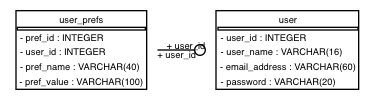

In [28]:
metadata = MetaData()
lookup_assets = Table('lookup_assets', metadata,
    Column('geo_id', Integer, primary_key=True),
    Column('year', Integer, nullable=False),
    Column('model', String(60), nullable=False),
    Column('geom_type', String(20), nullable=False)
)

precalc_agg = Table('precalc_agg', metadata,
    Column('pref_id', Integer, primary_key=True),
    Column('user_id', Integer, ForeignKey("user.user_id"), nullable=False),
    Column('pref_name', String(40), nullable=False),
    Column('pref_value', String(100))
)

graph = create_schema_graph(metadata=metadata,
                 show_datatypes=True,
                 show_indexes=True,
                 rankdir='LR',
                 concentrate=False)

##Generate png image                 
graph.write_png('dbschema.png')
Image('dbschema.png')